In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Asia/Shanghai"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Archive.apkg", filter_out_suspended_cards, filter_out_flags
)
analysis = optimizer.create_time_series(timezone, revlog_start_date, next_day_starts_at)
print(analysis)
S0_dataset_group_1 = optimizer.S0_dataset_group.copy()
df1 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df1.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/4879 [00:00<?, ?it/s]

Trainset saved.
Retention calculated.


  0%|          | 0/3833 [00:00<?, ?it/s]

Stability calculated.


analysis:   0%|          | 0/199 [00:00<?, ?it/s]

Analysis saved!
1:again, 2:hard, 3:good, 4:easy
    r_history  avg_interval  avg_retention  stability  factor  group_cnt
            1           1.0          0.898        1.1     inf        974
          1,3           3.0          0.913        3.5    3.18        762
        1,3,3           7.1          0.932       11.6    3.31        622
      1,3,3,3          16.3          0.881       14.8    1.28        463
    1,3,3,3,3          33.7          0.897       37.4    2.53        259
            3           1.0          0.969        3.5     inf       1920
          3,3           3.0          0.966        9.7    2.77       1689
        3,3,3           6.9          0.971       24.8    2.56       1529
      3,3,3,3          15.0          0.952       34.8    1.40       1246
    3,3,3,3,3          24.5          0.955       62.9    1.81        745
  3,3,3,3,3,3          40.3          0.931       83.0    1.32        490
3,3,3,3,3,3,3          70.9          0.958      269.6    3.25        252
   

In [3]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Learning.apkg", filter_out_suspended_cards, filter_out_flags
)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False
)
S0_dataset_group_2 = optimizer.S0_dataset_group.copy()
df2 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df2.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/5459 [00:00<?, ?it/s]

Trainset saved.
(65224, 12)


In [4]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_1
optimizer.pretrain(dataset=df1.copy(), verbose=False)
optimizer.train(verbose=False)
df1 = optimizer.dataset.copy()
w1 = optimizer.w

Pretrain finished!


  0%|          | 0/28850 [00:00<?, ?it/s]

Tensorized!
TRAIN: 22252 TEST: 6598
dataset built


train:   0%|          | 0/97245 [00:00<?, ?it/s]

TRAIN: 22429 TEST: 6421
dataset built


train:   0%|          | 0/97195 [00:00<?, ?it/s]

TRAIN: 23519 TEST: 5331
dataset built


train:   0%|          | 0/93980 [00:00<?, ?it/s]

TRAIN: 23174 TEST: 5676
dataset built


train:   0%|          | 0/97125 [00:00<?, ?it/s]

TRAIN: 24026 TEST: 4824
dataset built


train:   0%|          | 0/96995 [00:00<?, ?it/s]


Training finished!


In [5]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_2
optimizer.pretrain(df2.copy(), verbose=False)
optimizer.train(verbose=False)
df2 = optimizer.dataset.copy()
w2 = optimizer.w

Pretrain finished!


  0%|          | 0/59765 [00:00<?, ?it/s]

Tensorized!
TRAIN: 46282 TEST: 13483
dataset built


train:   0%|          | 0/219225 [00:00<?, ?it/s]

TRAIN: 48075 TEST: 11690
dataset built


train:   0%|          | 0/214135 [00:00<?, ?it/s]

TRAIN: 47788 TEST: 11977
dataset built


train:   0%|          | 0/219150 [00:00<?, ?it/s]

TRAIN: 48039 TEST: 11726
dataset built


train:   0%|          | 0/219030 [00:00<?, ?it/s]

TRAIN: 48876 TEST: 10889
dataset built


train:   0%|          | 0/218800 [00:00<?, ?it/s]


Training finished!


In [6]:
optimizer.define_model()
optimizer.S0_dataset_group = pd.concat(
    [S0_dataset_group_1, S0_dataset_group_2])
optimizer.pretrain(pd.concat([df1, df2]), verbose=False)
optimizer.train(verbose=False)
df3 = optimizer.dataset.copy()
w3 = optimizer.w

Pretrain finished!


  0%|          | 0/88615 [00:00<?, ?it/s]

Tensorized!
TRAIN: 68530 TEST: 20085
dataset built


train:   0%|          | 0/316450 [00:00<?, ?it/s]

TRAIN: 71602 TEST: 17013
dataset built


train:   0%|          | 0/308155 [00:00<?, ?it/s]

TRAIN: 70484 TEST: 18131
dataset built


train:   0%|          | 0/316305 [00:00<?, ?it/s]

TRAIN: 70937 TEST: 17678
dataset built


train:   0%|          | 0/316150 [00:00<?, ?it/s]

TRAIN: 72907 TEST: 15708
dataset built


train:   0%|          | 0/315820 [00:00<?, ?it/s]


Training finished!


In [7]:
print(w1, w2, w3, sep="\n")
print(df1.shape, df2.shape, df3.shape, sep="\n")

[1.3367, 1.3367, 4.5778, 9.3048, 5.2286, 1.5396, 1.3, 0.0265, 1.6932, 0.1088, 1.1143, 2.1835, 0.1314, 0.485, 1.6231, 0.0014, 3.2838]
[1.0962, 2.0041, 7.1752, 12.128, 5.7358, 1.5447, 1.2589, 0.0015, 1.5574, 0.1865, 0.9531, 2.4971, 0.0127, 0.3113, 0.7902, 0.0, 3.1243]
[1.2117, 1.2546, 6.3275, 12.0936, 5.433, 1.5096, 1.2508, 0.003, 1.575, 0.1687, 0.9549, 2.6583, 0.0122, 0.3143, 0.4993, 0.0, 3.2553]
(28850, 14)
(59765, 14)
(88615, 14)


log loss: 0.3003
R-squared: 0.9797
RMSE: 0.0111
MAE: 0.0051
ICI: 0.0028
E50: 0.0024
E90: 0.0047
EMax: 0.1315
[0.0259076  0.97177816]

Last rating: 1
R-squared: 0.6651
RMSE: 0.0291
MAE: 0.0199
ICI: 0.0184
E50: 0.0181
E90: 0.0279
EMax: 0.3835
[0.24266182 0.7161044 ]

Last rating: 2
R-squared: 0.6623
RMSE: 0.0505
MAE: 0.0446
ICI: 0.0414
E50: 0.0438
E90: 0.0516
EMax: 0.0524
[-0.04104295  0.99913548]

Last rating: 3
R-squared: 0.9697
RMSE: 0.0141
MAE: 0.0094
ICI: 0.0070
E50: 0.0079
E90: 0.0117
EMax: 0.0755
[0.0155171  0.99020969]

Last rating: 4
R-squared: 0.5949
RMSE: 0.0202
MAE: 0.0103
ICI: 0.0092
E50: 0.0079
E90: 0.0168
EMax: 0.0376
[0.27455375 0.71776228]


({'R-squared': 0.9796700364302275,
  'RMSE': 0.011075705030548494,
  'MAE': 0.005068233429470691,
  'ICI': 0.002803234243688944},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

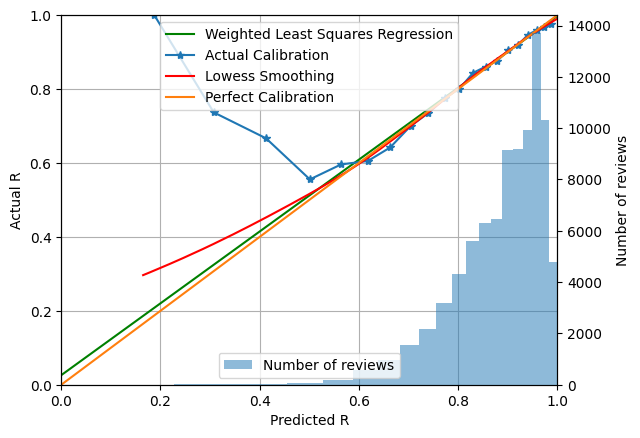

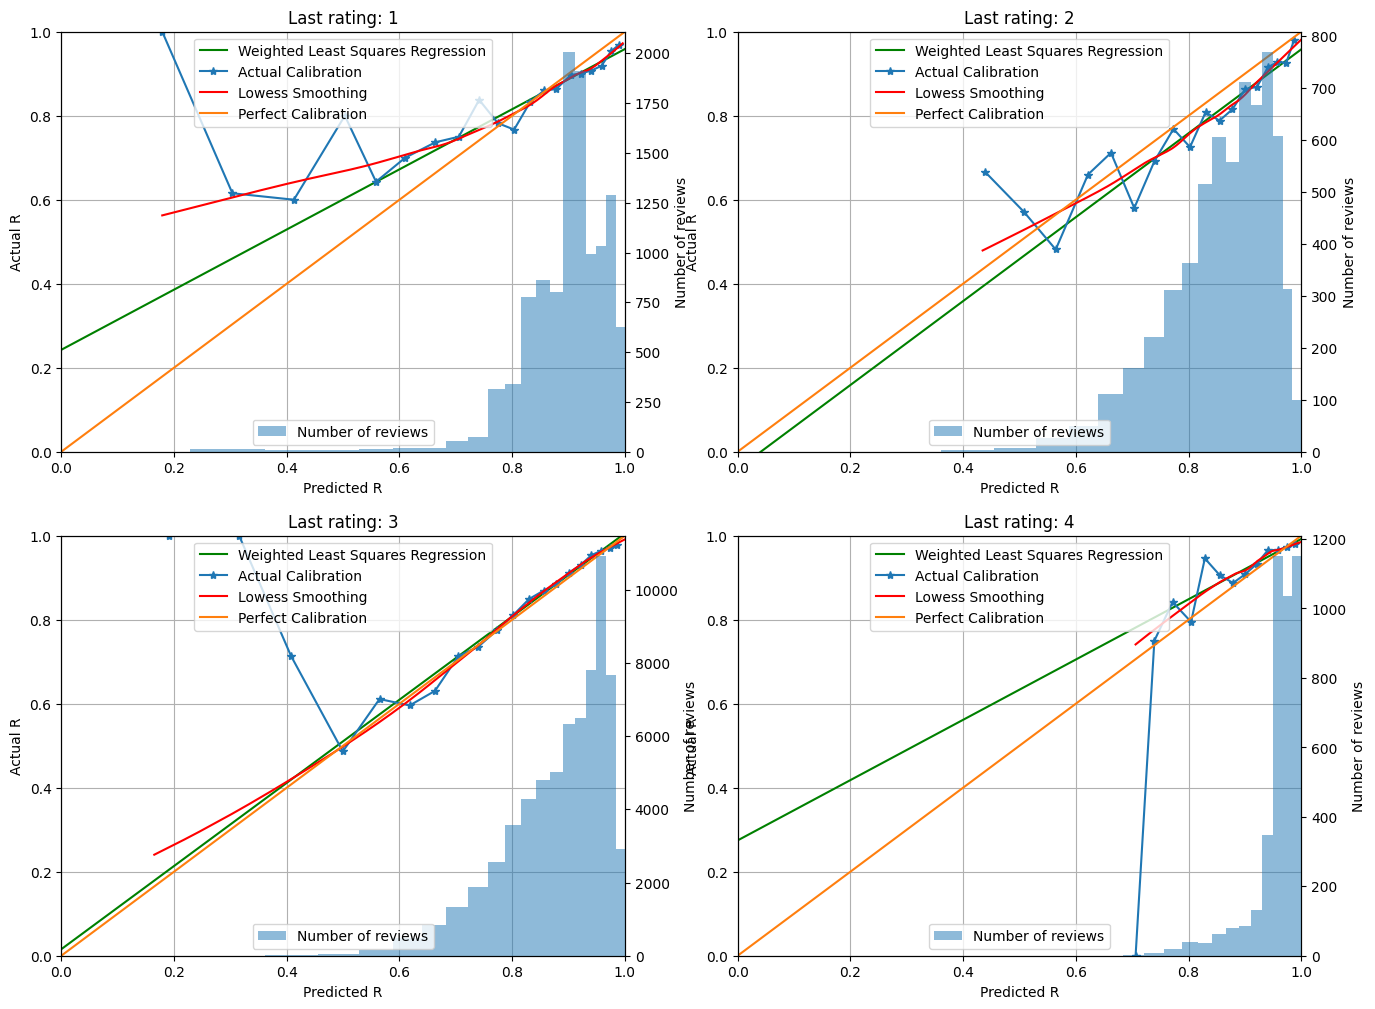

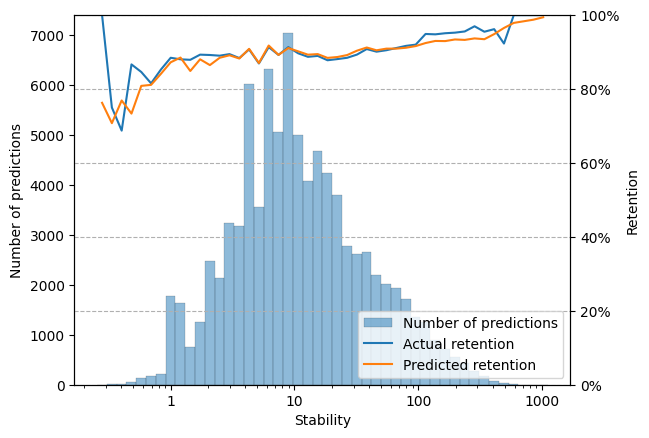

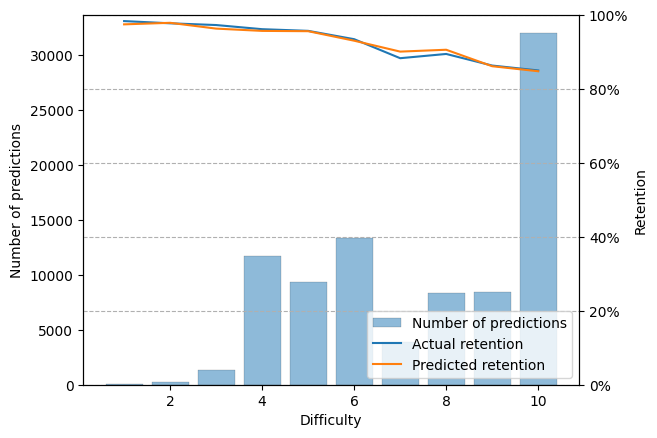

In [8]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

my_collection = Collection(w1)
stabilities, difficulties = my_collection.batch_predict(df1)
df1["stability"] = stabilities
df1["difficulty"] = difficulties
df1["p"] = power_forgetting_curve(df1["delta_t"], df1["stability"])

my_collection = Collection(w2)
stabilities, difficulties = my_collection.batch_predict(df2)
df2["stability"] = stabilities
df2["difficulty"] = difficulties
df2["p"] = power_forgetting_curve(df2["delta_t"], df2["stability"])

df_join = pd.concat([df1, df2])
print(f"log loss: {log_loss(df_join['y'], df_join['p']):.4f}")
optimizer.calibration_graph(df_join)

log loss: 0.3017
R-squared: 0.9733
RMSE: 0.0124
MAE: 0.0053
ICI: 0.0040
E50: 0.0037
E90: 0.0057
EMax: 0.1304
[4.24920693e-04 1.00100512e+00]

Last rating: 1
R-squared: 0.5884
RMSE: 0.0323
MAE: 0.0219
ICI: 0.0190
E50: 0.0169
E90: 0.0273
EMax: 0.3768
[0.24656975 0.71119184]

Last rating: 2
R-squared: 0.6683
RMSE: 0.0466
MAE: 0.0436
ICI: 0.0407
E50: 0.0428
E90: 0.0491
EMax: 0.0502
[-0.04003055  0.99894194]

Last rating: 3
R-squared: 0.9606
RMSE: 0.0157
MAE: 0.0112
ICI: 0.0091
E50: 0.0106
E90: 0.0132
EMax: 0.0611
[-0.02236671  1.03395919]

Last rating: 4
R-squared: 0.6849
RMSE: 0.0169
MAE: 0.0078
ICI: 0.0085
E50: 0.0102
E90: 0.0142
EMax: 0.0287
[0.23791924 0.75378134]


({'R-squared': 0.9733269823792455,
  'RMSE': 0.012373316914604863,
  'MAE': 0.005348794382682481,
  'ICI': 0.003956427583944148},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

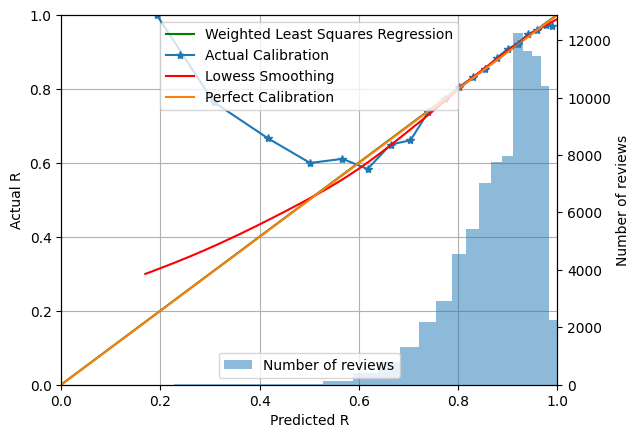

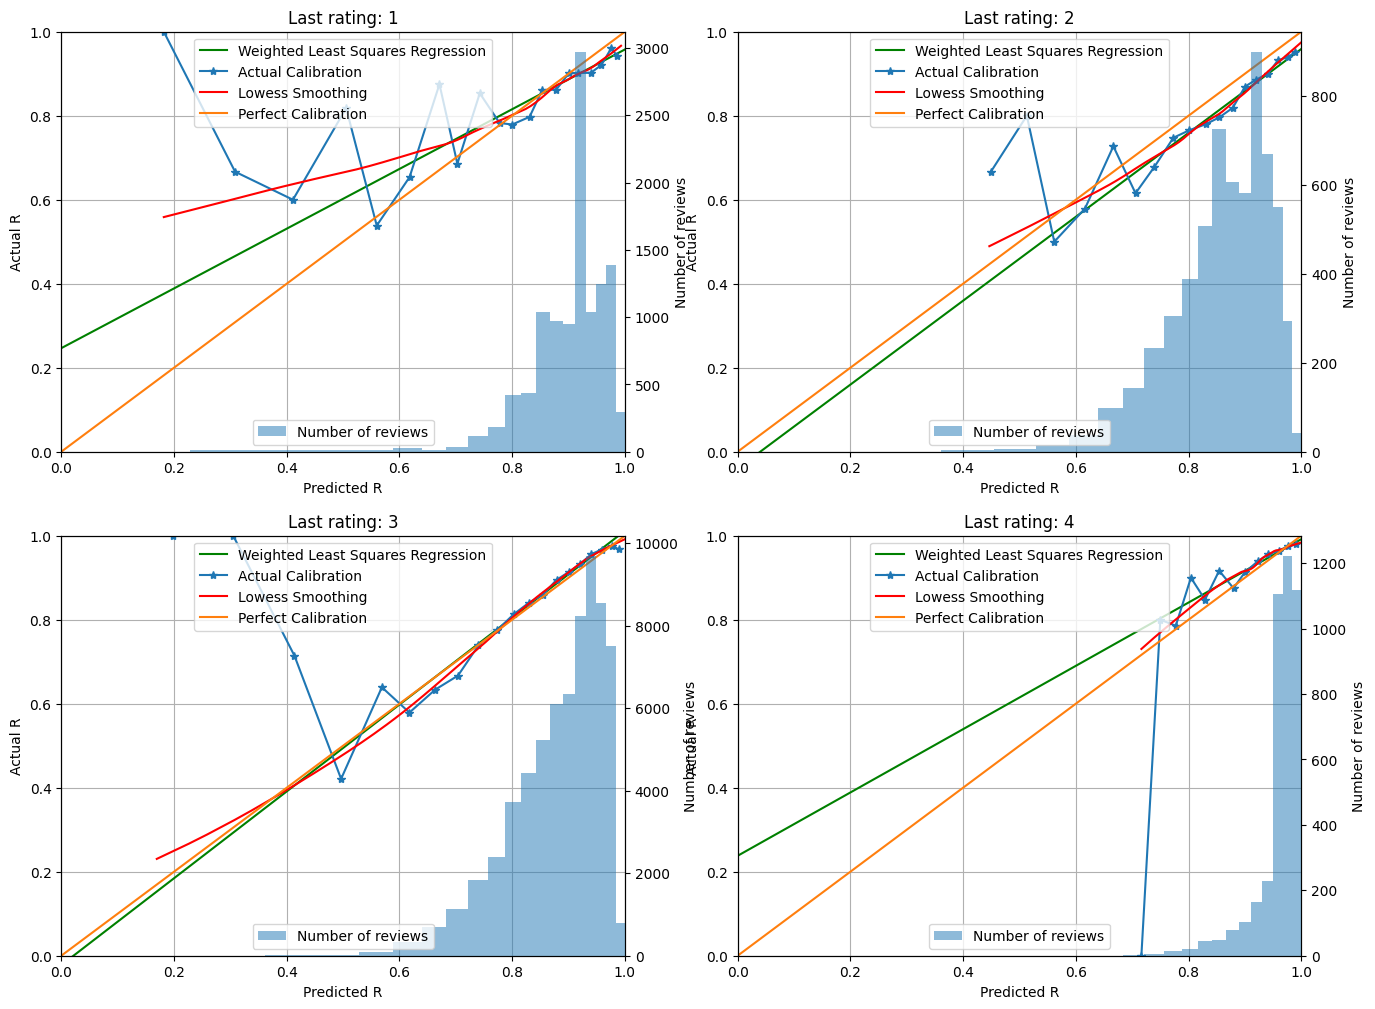

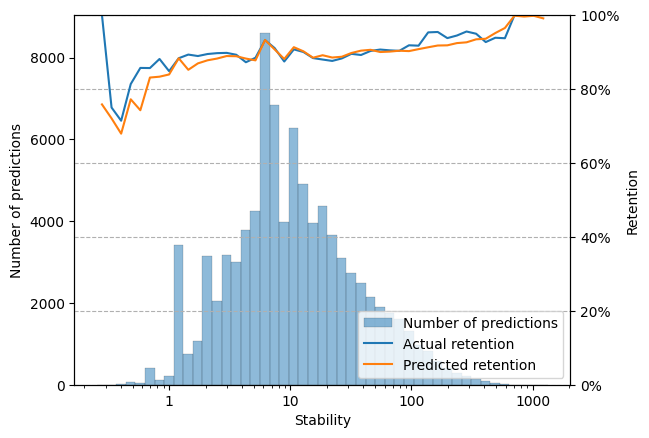

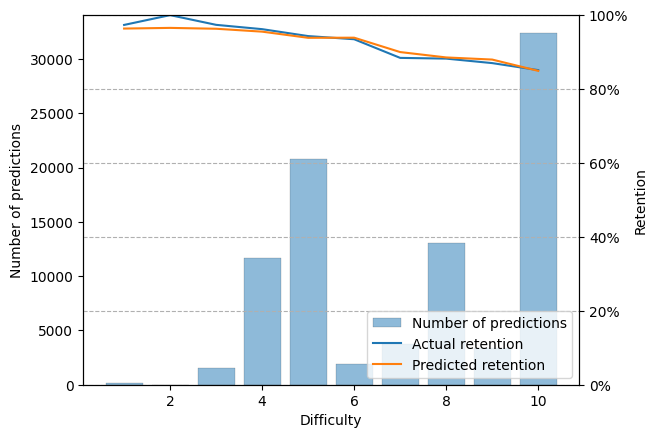

In [9]:
my_collection = Collection(w3)
stabilities, difficulties = my_collection.batch_predict(df3)
df3["stability"] = stabilities
df3["difficulty"] = difficulties
df3["p"] = power_forgetting_curve(df3["delta_t"], df3["stability"])
print(f"log loss: {log_loss(df3['y'], df3['p']):.4f}")
optimizer.calibration_graph(df3)